In [1]:
import pandas as pd
df = pd.read_csv('SYB66_246_202310_Population Growth.csv', encoding = 'latin1', header = 1)
df

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.3,NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",37.1,NaN,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",254,NaN,"World Health Organization (WHO), the United Na..."
4,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),70.1,NaN,"United Nations Population Division, New York, ..."
...,...,...,...,...,...,...,...
6751,722,SIDS,2022,Total fertility rate (children per women),2.3,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
6752,722,SIDS,2022,"Infant mortality for both sexes (per 1,000 liv...",27.3,Projected estimate (medium fertility variant).,"United Nations Statistics Division, New York, ..."
6753,722,SIDS,2022,Life expectancy at birth for both sexes (years),72.5,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
6754,722,SIDS,2022,Life expectancy at birth for males (years),69.6,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."


<AxesSubplot:xlabel='Infant mortality for both sexes (per 1,000 live births)', ylabel='Life expectancy at birth for both sexes (years)'>

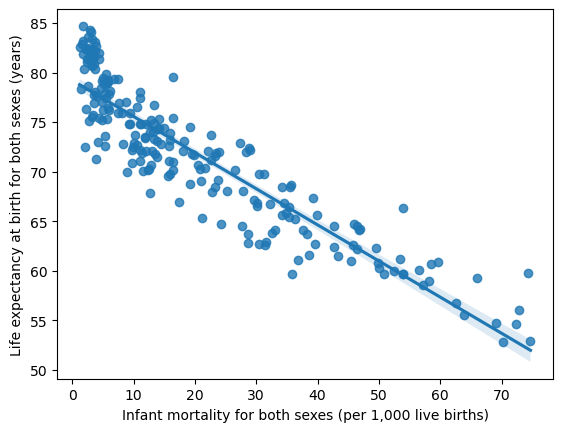

In [2]:
#Relacion entre Mortalidad infantil y esperanza de vida
df2 = df[df['Year'] == 2020]
df2 = df2[df2['Series'].isin(['Infant mortality for both sexes (per 1,000 live births)','Life expectancy at birth for both sexes (years)'])]
df2 = df2.astype({'Value' : 'float64', 'Series' : 'object'})
pt = pd.pivot_table(df2, values = 'Value', index = ['Year', 'Unnamed: 1'], columns = ['Series'])
pt2 = pt.reset_index()
import seaborn as sns
sns.regplot(x = 'Infant mortality for both sexes (per 1,000 live births)', y = 'Life expectancy at birth for both sexes (years)', data = pt2)

In [ ]:
#Podemos determinar que tenemos una concentracion significativa en donde vemos la relacion de una 
#esperanza de vida por encima de los 70 años con una mortalidad infantil por debajo de los 10 años.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3988\2365539681.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Value'] = df3['Value'].str.replace(',','.')


<AxesSubplot:xlabel='None-Series', ylabel='None-Series'>

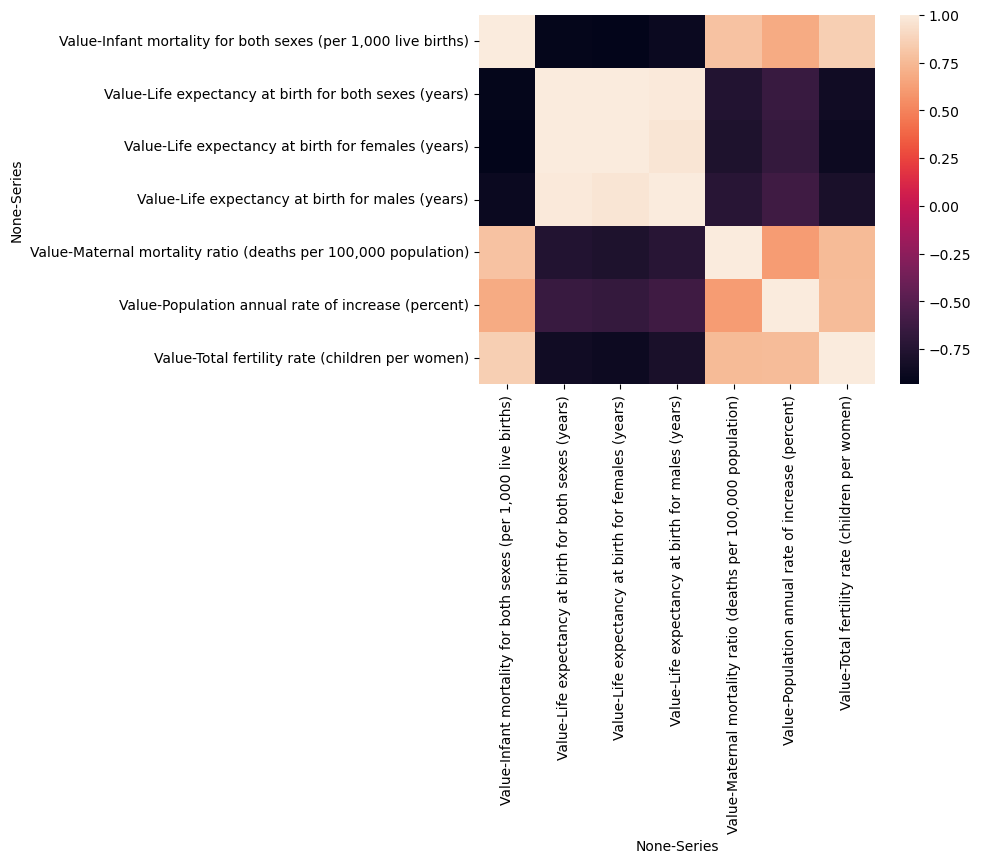

In [37]:
#Relacion entre Mortalidad infantil y esperanza de vida
import numpy as np
df3 = df[df['Year'] == 2020]
df3['Value'] = df3['Value'].str.replace(',','.')
#df3 = df3['Value'].astype(float)
table = pd.pivot_table(df3, index = ['Unnamed: 1'], columns = ['Series'], values = ['Value'])
table1 = table.reset_index()
table1.fillna(0)
sns.heatmap(table1.corr())

In [ ]:
#Podemos obersar que estan mayormente correlacionados el Population annual rate of increase con el Maternal mortality ratio,
#asi como tambien el infant mortality for both sexes